In [1]:
import pandas as pd

In [2]:
datos = pd.read_csv("events_up_to_01062018.csv",low_memory=False)

In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341681 entries, 0 to 2341680
Data columns (total 23 columns):
timestamp                   object
event                       object
person                      object
url                         object
sku                         float64
model                       object
condition                   object
storage                     object
color                       object
skus                        object
search_term                 object
staticpage                  object
campaign_source             object
search_engine               object
channel                     object
new_vs_returning            object
city                        object
region                      object
country                     object
device_type                 object
screen_resolution           object
operating_system_version    object
browser_version             object
dtypes: float64(1), object(22)
memory usage: 410.9+ MB


In [4]:
datos.event.value_counts()

viewed product       1248124
brand listing         216312
visited site          204069
ad campaign hit       191388
generic listing       160176
searched products     130616
search engine hit     106406
checkout               65315
staticpage             11201
conversion              7091
lead                     983
Name: event, dtype: int64

In [5]:
datos.sample()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
2320951,2018-04-25 14:50:32,visited site,f9fcc395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Direct,Returning,Salvador,Bahia,Brazil,Smartphone,360x640,Android 5.0.2,Samsung Internet 6.4


In [6]:
datos['month'] = datos['timestamp'].str.split(" ").str[0].str.split("-").str[1]
datos.month.value_counts()

05    1713920
04     309849
03     193790
02      73541
01      50581
Name: month, dtype: int64

In [7]:
eventos_x_person = datos[['person','event','timestamp']]
eventos_x_person = eventos_x_person.groupby(['person','event']).agg({'timestamp':'count'})
eventos_x_person = eventos_x_person.unstack(-1)
eventos_x_person.columns = eventos_x_person.columns.droplevel(0)
eventos_x_person.columns#{'person','ad campaign hit','brand listing','checkout','conversion','generic listing'\
                           #'lead','search engine hit','searched products','staticpage','viewed product','visited site'}
eventos_x_person = eventos_x_person.reset_index(level=0,drop=False)
eventos_x_person

event,person,ad campaign hit,brand listing,checkout,conversion,generic listing,lead,search engine hit,searched products,staticpage,viewed product,visited site
0,0008ed71,NaN,NaN,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0
1,00091926,15.0,25.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,372.0,34.0
2,00091a7a,1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0
3,000ba417,1.0,24.0,6.0,1.0,14.0,NaN,1.0,NaN,NaN,153.0,6.0
4,000c79fe,1.0,NaN,1.0,NaN,1.0,NaN,1.0,9.0,NaN,3.0,1.0
5,000e4d9e,19.0,17.0,1.0,NaN,17.0,NaN,5.0,NaN,NaN,339.0,13.0
6,000e619d,6.0,11.0,1.0,NaN,8.0,NaN,3.0,6.0,NaN,28.0,5.0
7,001001be,NaN,NaN,3.0,1.0,3.0,NaN,NaN,17.0,NaN,41.0,3.0
8,0010e89a,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
9,0016c4b5,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0


In [8]:
eventos_x_person = eventos_x_person.fillna(0)

In [9]:
import matplotlib.pyplot as plt

In [10]:
values = eventos_x_person['conversion'].value_counts().index.tolist()
values

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 11.0,
 10.0,
 13.0,
 12.0,
 14.0,
 44.0,
 21.0,
 129.0,
 32.0,
 19.0,
 30.0]

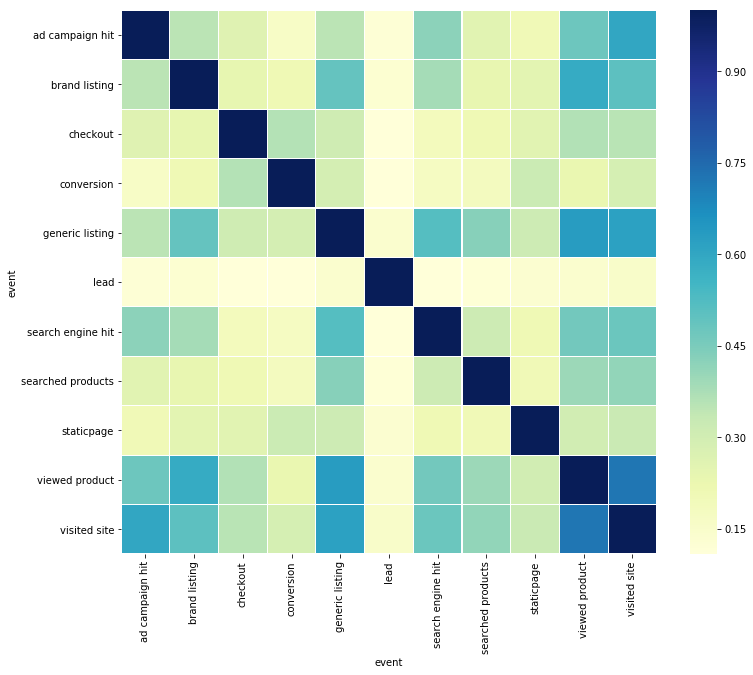

In [11]:
import seaborn as sns
corrmat = eventos_x_person.corr(method='spearman')
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidths=0.1)

Saco los 3 features con menos correlación, y podemos notar una gran similitud entre viewed product y visited site.

In [12]:
eventos_x_person.drop(columns=['staticpage','searched products','lead'],inplace=True)

In [14]:
eventos_x_person['label'] = 0
eventos_x_person.loc[eventos_x_person['conversion'] != 0.0,'label'] = 1

In [15]:
eventos_x_person.label.value_counts()

0    34536
1     4293
Name: label, dtype: int64

In [16]:
test_final = pd.read_csv("labels_training_set.csv")
test_final = pd.merge(test_final,eventos_x_person,on='person',how='left')

In [17]:
test_final.drop(columns={'label_y'},inplace=True)
test_final.rename(columns={'label_x':'label'},inplace=True)

In [18]:
# Features
f1 = 'ad campaign hit'
f2 = 'brand listing'
f3 = 'checkout'
f4 = 'conversion'
f5 = 'generic listing'
f6 = 'search engine hit'
f7 = 'viewed product'
f8 = 'visited site'

features = [f1,f2,f3,f4,f5,f6,f8]

In [19]:
x_test_final = test_final[features]

In [24]:
id_person = test_final['person']

In [20]:
from time import time
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

test_s = 0.25
random_s = 0


x = np.array(eventos_x_person[features])
y = np.array(eventos_x_person[['label']]).reshape((38829,1))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_s, random_state=random_s)

In [21]:
from sklearn.neighbors import KNeighborsClassifier


t0 = time()

print('VALORES INICIALES PARA K')

k_valores = [5,10,20,50]
mejor_k = 0
mejor_precision = 0

for k in k_valores:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    precision = accuracy_score(y_test, pred)
    print('La precisión para k=', k, 'es:',precision)
    if precision > mejor_precision:
        mejor_precision = precision
        mejor_k = k
        
print('Con k=', mejor_k, 'se obtuvo la mayor precisión:', mejor_precision)

tf = time() - t0
print ("Tiempo de ejecución: %0.5f seconds." % tf)

VALORES INICIALES PARA K


/home/mariano/ENTER/lib/python3.6/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


La precisión para k= 5 es: 0.9138854552946024


/home/mariano/ENTER/lib/python3.6/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


La precisión para k= 10 es: 0.9054388133498146


/home/mariano/ENTER/lib/python3.6/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


La precisión para k= 20 es: 0.9024515863205603


/home/mariano/ENTER/lib/python3.6/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


La precisión para k= 50 es: 0.8990523279769262
Con k= 5 se obtuvo la mayor precisión: 0.9138854552946024
Tiempo de ejecución: 2.97247 seconds.


In [22]:
# Creamos el KNN
knn = KNeighborsClassifier(n_neighbors=mejor_k)

# Lo entrenamos con la totalidad del set de datos
knn.fit(x,y)

# Predecimos las postulaciones del set final
pred_final = knn.predict(x_test_final)

/home/mariano/ENTER/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


Importo la métrica del kaggle

In [44]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_final['label'],pred_final)

0.5366881405920294